In [0]:
# Quiz.
# [ 0 1 2 0 1 2 0 1 2] 배열을
#
# [ 1 0 0 ]
# [ 0 1 0 ]
# [ 0 0 1 ]
# [ 0 0 0 ]
# [ 0 1 0 ]
# [ 0 0 1 ]
# [ 1 0 0 ]
# [ 0 1 0 ]
# [ 0 0 1 ]
# [ 0 0 0 ]
# 배열로 변환
import numpy as np

a = np.array([0,1,2,0,1,2,0,1,2])
b = np.zeros((a.shape[0],3))

# b[:,0] = (a==0)*1.0
# b[:,1] = (a==1)*1.0
# b[:,2] = (a==2)*1.0
for i in range(3):
  b[:,i] = (a==i)*1.0
  
print(b)


[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [0]:
# Quiz. 임의의 데이터를 6:4로 나눈다.
# [1 2 3 4 ... 9 0]을
# [ 1 2 .. 6], [ 7 8 .. 0]으로 나눈다.

a = np.array([1,2,3,4,5,6,7,8,9,0])

split_index = int(a.shape[0]*0.6)
print(split_index)

b1 = a[0:split_index]
b2 = a[split_index:]

print(b1)
print(b2)

6
[1 2 3 4 5 6]
[7 8 9 0]


In [0]:
# Quiz. 임의의 데이터를 6:4로 나눈다.
#
# [ 1 0 0 ]
# [ 2 0 0 ]
# ...
# [ 0 0 0 ]
# 를
#
# [ 1 0 0 ]
# ...
# [ 6 0 0 ]
# 와
# [ 7 0 0 ]
# ...
# [ 0 0 0 ]




In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

import time

In [0]:
from tensorflow.python.client import device_lib

print(tf.test.gpu_device_name())

!nvidia-smi

/device:GPU:0
Mon Jul 22 01:10:42 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   70C    P0    79W / 149W |     71MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Mem

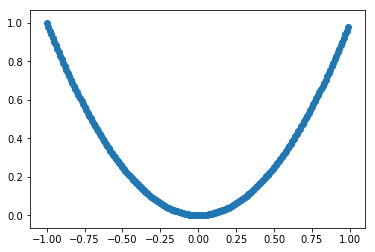

In [0]:
x = np.arange(-1, 1, 0.01)
y = x**2

plt.scatter(x,y)

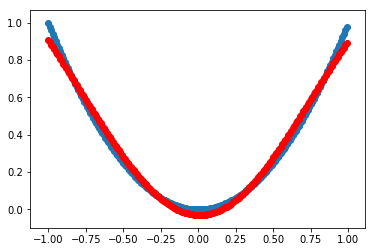

In [0]:
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse")

model.fit(x, y, epochs=1000, verbose=0, batch_size=20)

y_ = model.predict(x)

plt.scatter(x,y)
plt.scatter(x,y_, color="r")
plt.show()

200/200 [==============================] - 0s 302us/sample - loss: 0.0829 - mean_squared_error: 0.0829
loss= 0.08293111920356751
mse= 0.082931116


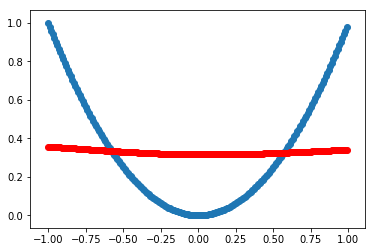

In [0]:
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

# model.compile(optimizer="SGD", loss="mse")
model.compile(optimizer="SGD", loss="mse", metrics=["mse"])

model.fit(x, y, epochs=100, verbose=0, batch_size=20)

loss, mse = model.evaluate(x, y) # ADD
print("loss=", loss) # ADD
print("mse=", mse) # ADD
              
y_ = model.predict(x)

plt.scatter(x,y)
plt.scatter(x,y_, color="r")
plt.show()

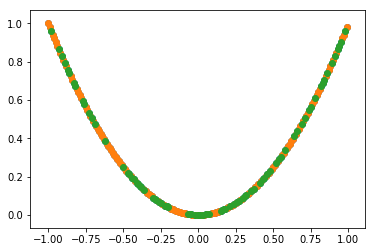

In [0]:
x = np.arange(-1, 1, 0.01)
np.random.shuffle(x)
y = x**2

plt.scatter(x,y)

s = int(x.shape[0]*0.6)

train_x, test_x = x[:s], x[s:]
train_y, test_y = y[:s], y[s:]

plt.scatter(train_x, train_y)
plt.scatter(test_x, test_y)
plt.show()






80/80 [==============================] - 0s 680us/sample - loss: 0.0013 - mean_squared_error: 0.0013
loss= 0.001266547036357224
mse= 0.001266547


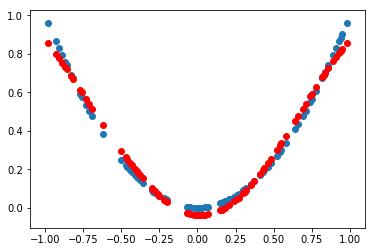

In [0]:
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mse"])

# model.fit(x, y, epochs=1000, verbose=0, batch_size=20)
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)

# loss, mse = model.evaluate(x, y)
loss, mse = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mse=", mse)
              
# y_ = model.predict(x)
y_ = model.predict(test_x)

# plt.scatter(x,y)
# plt.scatter(x,y_, color="r")
plt.scatter(test_x,test_y)
plt.scatter(test_x,y_, color="r")
plt.show()

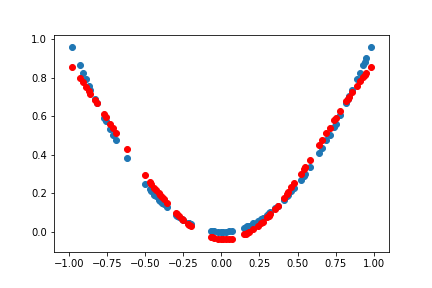

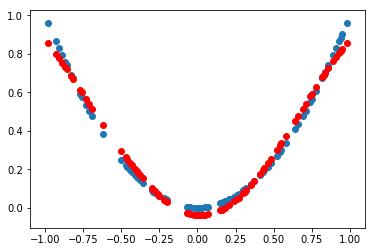

In [0]:
plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.savefig("base_result.png")

from IPython.display import Image
display(Image("base_result.png"))

elapsed : 16.86872887611389
80/80 [==============================] - 0s 799us/sample - loss: 0.0021 - mean_squared_error: 0.0021
loss= 0.0020977777894586325
mse= 0.0020977778


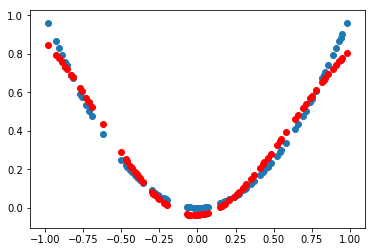

In [0]:
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mse"])

start = time.time() # ADD
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed :", (time.time() - start)) # ADD

loss, mse = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mse=", mse)
              
y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_, color="r")
plt.show()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_43 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 16.89844799041748
80/80 [==============================] - 0s 837us/sample - loss: 9.9260e-04 - mean_squared_error: 9.9260e-04
loss= 0.0009926006896421313
mse= 0.0009926007


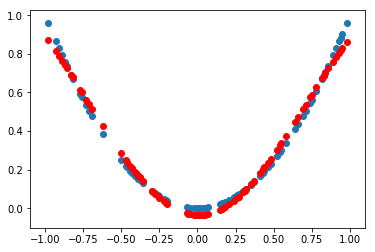

In [0]:
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary() # ADD

start = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed :", (time.time() - start))

loss, mse = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mse=", mse)
              
y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_, color="r")
plt.show()

In [0]:
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()

start = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed :", (time.time() - start))

loss, mse = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mse=", mse)
              
y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_, color="r")
plt.show()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_46 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
elapsed : 16.293330192565918
80/80 [==============================] - 0s 890us/sample - loss: 0.0021 - mean_squared_error: 0.0021
loss= 0.0021162593737244608
mse= 0.0021162594


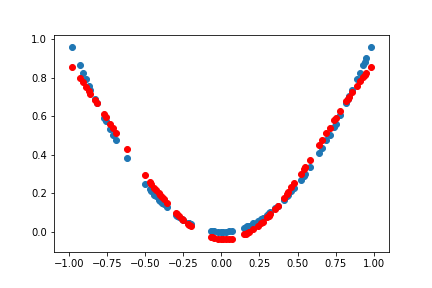

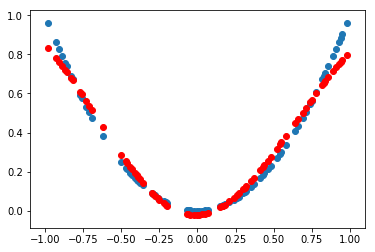

In [0]:
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
# model.add(Dense(10, activation='tanh')) # COMMENT OUT
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()

start = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed :", (time.time() - start))

loss, mse = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mse=", mse)
              
display(Image("base_result.png")) # ADD

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_, color="r")
plt.show()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_48 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_49 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_50 (Dense)             (None, 1)                 11        
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________
elapsed : 17.482149124145508
80/80 [==============================] - 0s 849us/sample - loss: 0.0031 - mean_squared_error: 0.0031
loss= 0.0030837154947221277
mse= 0.0030837157


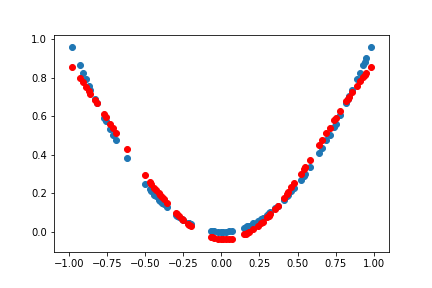

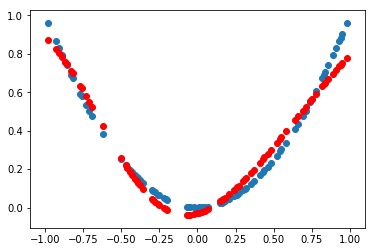

In [0]:
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh')) # ADDED
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()

start = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed :", (time.time() - start))

loss, mse = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mse=", mse)
              
display(Image("base_result.png")) # ADD

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_, color="r")
plt.show()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_52 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_53 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_54 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_55 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_56 (Dense)             (None, 1)                 11        
Total params: 471
Trainable params: 471
Non-trainable params: 0
_______________________________________________________

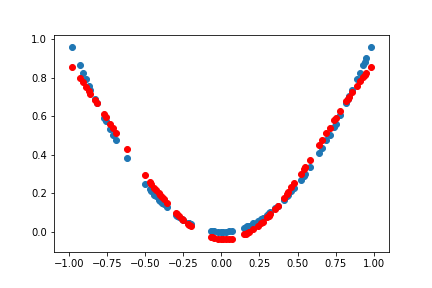

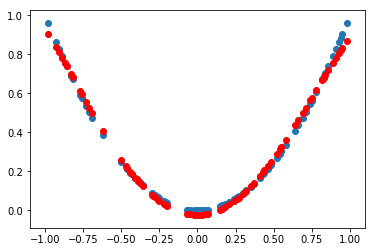

In [0]:
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh')) # ADDED
model.add(Dense(10, activation='tanh')) # ADDED
model.add(Dense(10, activation='tanh')) # ADDED
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()

start = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed :", (time.time() - start))

loss, mse = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mse=", mse)
              
display(Image("base_result.png")) # ADD

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_, color="r")
plt.show()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_58 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_59 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_60 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_61 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_62 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_63 (Dense)             (None, 10)              

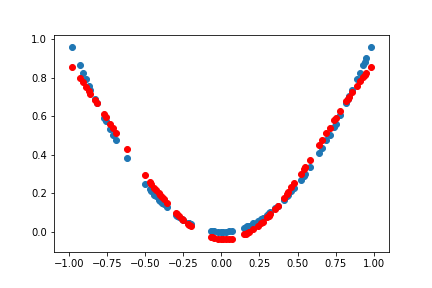

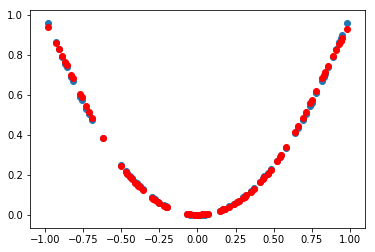

In [0]:
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh')) # ADDED
model.add(Dense(10, activation='tanh')) # ADDED
model.add(Dense(10, activation='tanh')) # ADDED
model.add(Dense(10, activation='tanh')) # ADDED
model.add(Dense(10, activation='tanh')) # ADDED
model.add(Dense(10, activation='tanh')) # ADDED
model.add(Dense(10, activation='tanh')) # ADDED
model.add(Dense(10, activation='tanh')) # ADDED
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()

start = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed :", (time.time() - start))

loss, mse = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mse=", mse)
              
display(Image("base_result.png")) # ADD

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_, color="r")
plt.show()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_68 (Dense)             (None, 5)                 10        
_________________________________________________________________
dense_69 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_70 (Dense)             (None, 1)                 6         
Total params: 46
Trainable params: 46
Non-trainable params: 0
_________________________________________________________________
elapsed : 16.609087467193604
80/80 [==============================] - 0s 1ms/sample - loss: 0.0022 - mean_squared_error: 0.0022
loss= 0.0021914230193942784
mse= 0.002191423


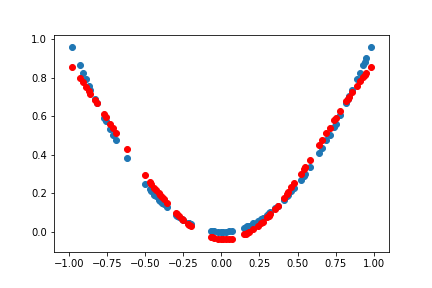

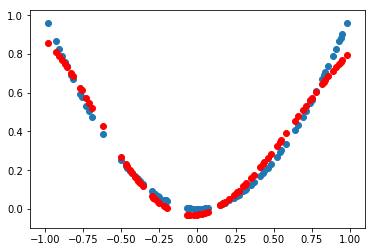

In [0]:
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
# model.add(Dense(10, activation='tanh', input_shape=(1,)))
# model.add(Dense(10, activation='tanh'))
model.add(Dense(5, activation='tanh', input_shape=(1,)))
model.add(Dense(5, activation='tanh'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()

start = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed :", (time.time() - start))

loss, mse = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mse=", mse)
              
display(Image("base_result.png")) # ADD

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_, color="r")
plt.show()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_71 (Dense)             (None, 2)                 4         
_________________________________________________________________
dense_72 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_73 (Dense)             (None, 1)                 3         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________
elapsed : 17.29109764099121
80/80 [==============================] - 0s 1ms/sample - loss: 0.0023 - mean_squared_error: 0.0023
loss= 0.0023095874581485986
mse= 0.0023095876


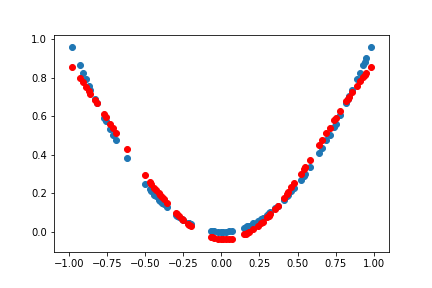

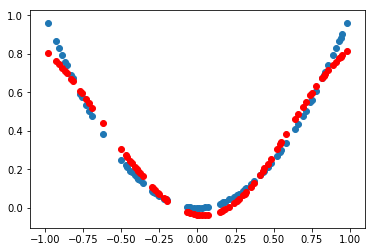

In [0]:
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
# model.add(Dense(10, activation='tanh', input_shape=(1,)))
# model.add(Dense(10, activation='tanh'))
model.add(Dense(2, activation='tanh', input_shape=(1,)))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()

start = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed :", (time.time() - start))

loss, mse = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mse=", mse)
              
display(Image("base_result.png")) # ADD

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_, color="r")
plt.show()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_74 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_75 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_76 (Dense)             (None, 1)                 2         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________
elapsed : 17.111294746398926
80/80 [==============================] - 0s 1ms/sample - loss: 0.0665 - mean_squared_error: 0.0665
loss= 0.06651669889688491
mse= 0.0665167


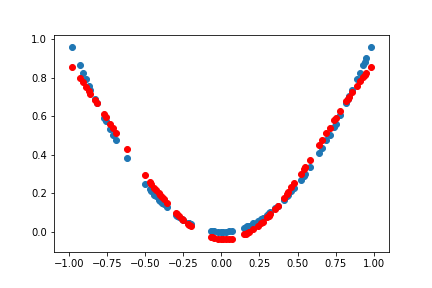

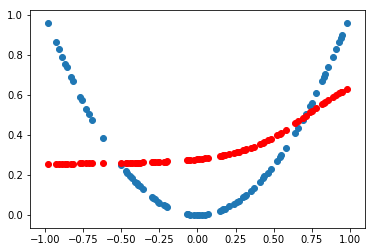

In [0]:
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
# model.add(Dense(10, activation='tanh', input_shape=(1,)))
# model.add(Dense(10, activation='tanh'))
model.add(Dense(1, activation='tanh', input_shape=(1,)))
model.add(Dense(1, activation='tanh'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()

start = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed :", (time.time() - start))

loss, mse = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mse=", mse)
              
display(Image("base_result.png")) # ADD

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_, color="r")
plt.show()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_77 (Dense)             (None, 20)                40        
_________________________________________________________________
dense_78 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_79 (Dense)             (None, 1)                 21        
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________
elapsed : 17.125115633010864
80/80 [==============================] - 0s 1ms/sample - loss: 0.0018 - mean_squared_error: 0.0018
loss= 0.001775662461295724
mse= 0.0017756624


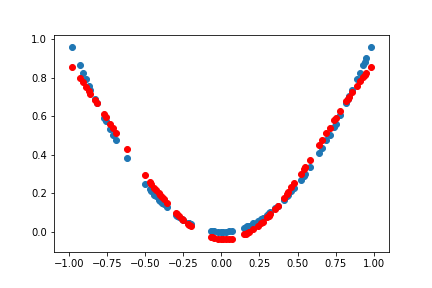

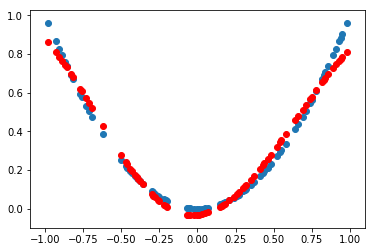

In [0]:
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
# model.add(Dense(10, activation='tanh', input_shape=(1,)))
# model.add(Dense(10, activation='tanh'))
model.add(Dense(20, activation='tanh', input_shape=(1,)))
model.add(Dense(20, activation='tanh'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()

start = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed :", (time.time() - start))

loss, mse = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mse=", mse)
              
display(Image("base_result.png")) # ADD

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_, color="r")
plt.show()

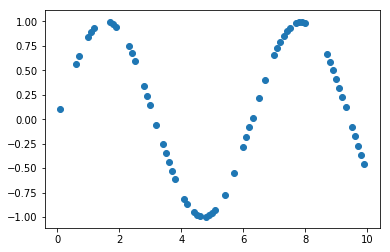

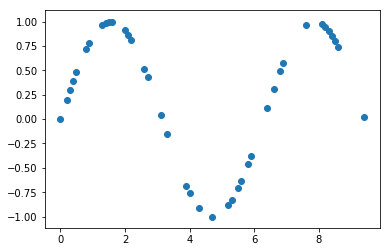

In [0]:
# x = np.arange(-1, 1, 0.01)
# np.random.shuffle(x)
# y = x**2

def get_sin_data(start, end, step):
  
  x = np.arange(start, end, step) # ADD
  np.random.shuffle(x) # ADD
  y = np.sin(x) # ADD

  s = int(x.shape[0]*0.6)

  train_x, test_x = x[:s], x[s:]
  train_y, test_y = y[:s], y[s:]
  
  return (train_x, train_y), (test_x, test_y)


start = 0
end = 10
step = 0.1

(train_x, train_y), (test_x, test_y) = get_sin_data(start, end, step)

plt.scatter(train_x, train_y)
plt.show()

plt.scatter(test_x, test_y)
plt.show()





Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_80 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_81 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_82 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 9.950153589248657
40/40 [==============================] - 0s 3ms/sample - loss: 0.1206 - mean_squared_error: 0.1206
loss= 0.12055132985115051
mse= 0.120551325


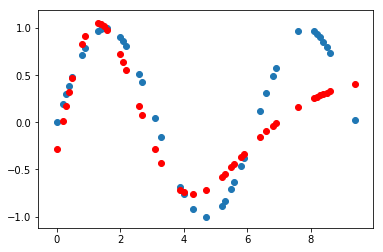

In [0]:
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()

start = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed :", (time.time() - start))

loss, mse = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mse=", mse)
              
y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_, color="r")
plt.show()

0 times fitting
elapsed : 8.992295742034912


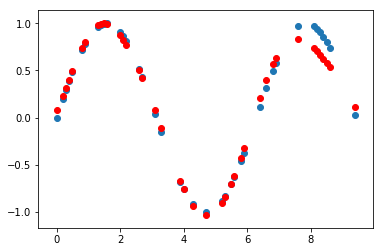

1 times fitting
elapsed : 8.980334997177124


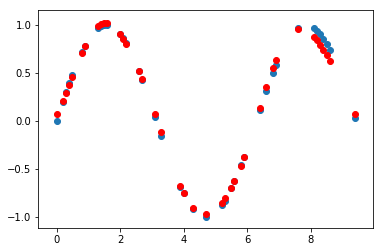

2 times fitting
elapsed : 8.972110509872437


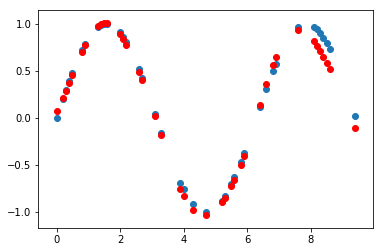

3 times fitting
elapsed : 9.107942342758179


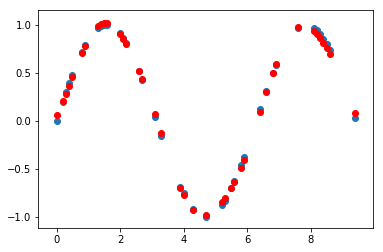

4 times fitting
elapsed : 9.336103916168213


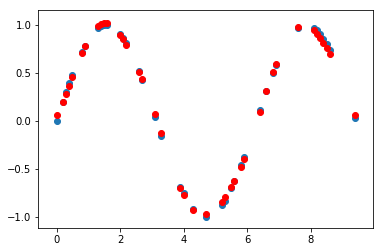

5 times fitting
elapsed : 9.015490531921387


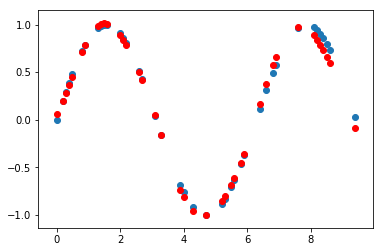

6 times fitting
elapsed : 9.037943601608276


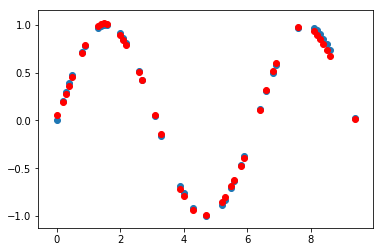

7 times fitting
elapsed : 9.040451049804688


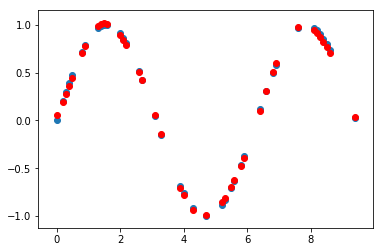

8 times fitting
elapsed : 8.99964714050293


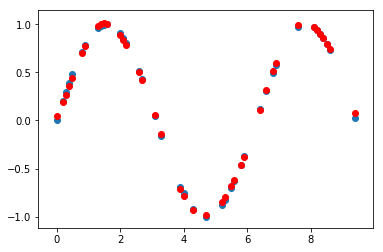

9 times fitting
elapsed : 9.043740510940552


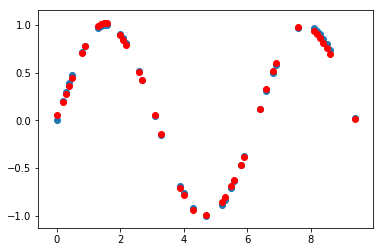

In [0]:
def do_train():
  start = time.time()
  model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
  print("elapsed :", (time.time() - start))

  y_ = model.predict(test_x)

  plt.scatter(test_x,test_y)
  plt.scatter(test_x,y_, color="r")
  plt.show()


for i in range(10):
  print("{} times fitting".format(i))
  do_train()
  

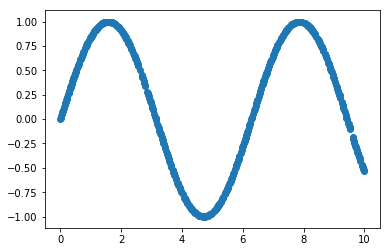

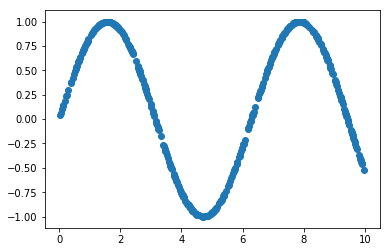

In [0]:
# (train_x, train_y), (test_x, test_y) = get_sin_data(0, 10, 0.1)
(train_x, train_y), (test_x, test_y) = get_sin_data(0, 10, 0.01)

plt.scatter(train_x, train_y)
plt.show()

plt.scatter(test_x, test_y)
plt.show()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_83 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_84 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_85 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 74.5996823310852


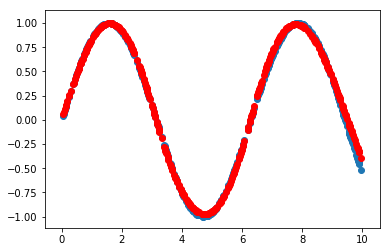

elapsed : 74.76932263374329


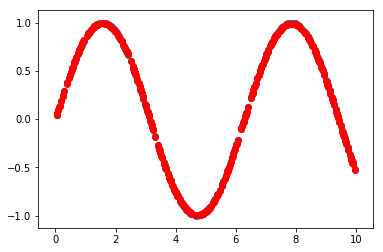

KeyboardInterrupt: ignored

In [0]:
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()

for i in range(10): # ADD
  
  start = time.time()
  model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
  print("elapsed :", (time.time() - start))

  # loss, mse = model.evaluate(test_x, test_y)
  # print("loss=", loss)
  # print("mse=", mse)

  y_ = model.predict(test_x)

  plt.scatter(test_x,test_y)
  plt.scatter(test_x,y_, color="r")
  plt.show()

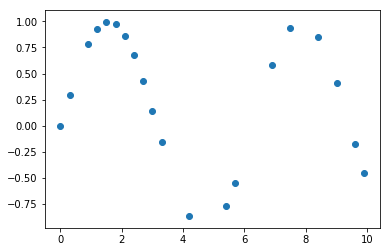

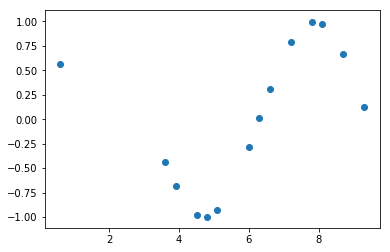

In [0]:
# (train_x, train_y), (test_x, test_y) = get_sin_data(0, 10, 0.1)
(train_x, train_y), (test_x, test_y) = get_sin_data(0, 10, 0.3)

plt.scatter(train_x, train_y)
plt.show()

plt.scatter(test_x, test_y)
plt.show()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_86 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_87 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_88 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 5.4843902587890625


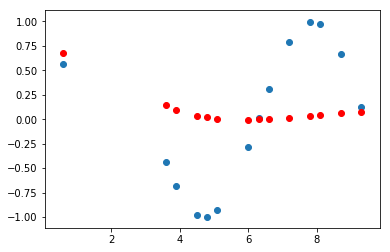

elapsed : 4.157679557800293


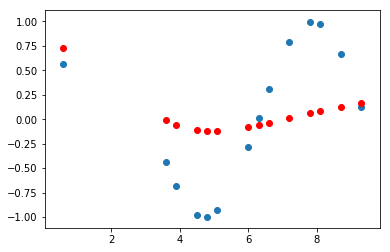

elapsed : 4.224483013153076


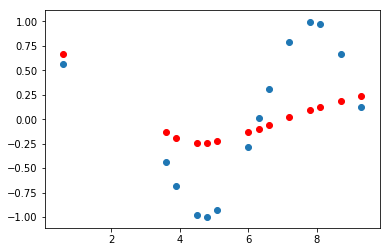

elapsed : 4.17112398147583


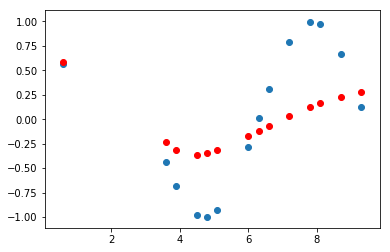

elapsed : 4.322102308273315


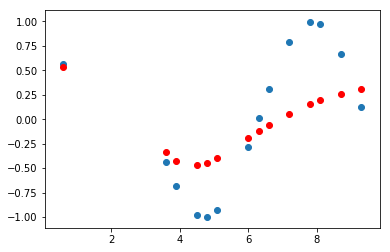

elapsed : 4.315387725830078


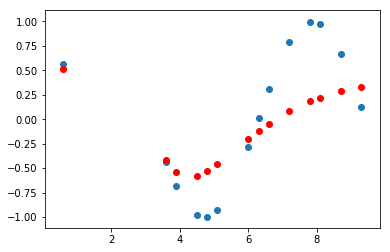

elapsed : 4.191540002822876


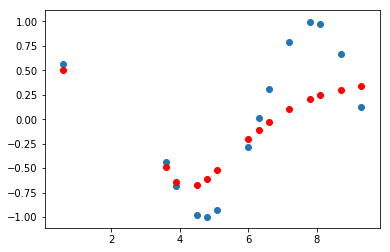

elapsed : 4.2281999588012695


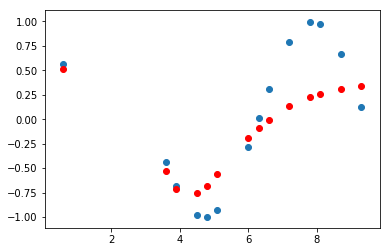

elapsed : 4.188115119934082


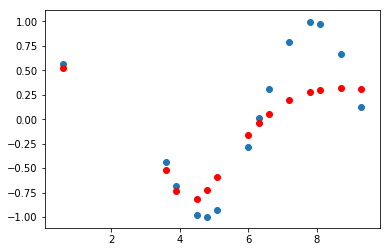

elapsed : 4.184817790985107


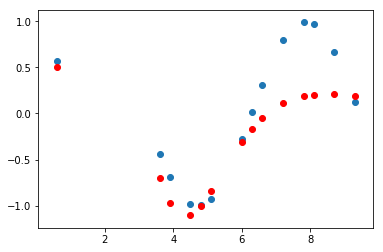

In [0]:
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()

for i in range(10): # ADD
  
  start = time.time()
  model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
  print("elapsed :", (time.time() - start))

  # loss, mse = model.evaluate(test_x, test_y)
  # print("loss=", loss)
  # print("mse=", mse)

  y_ = model.predict(test_x)

  plt.scatter(test_x,test_y)
  plt.scatter(test_x,y_, color="r")
  plt.show()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_95 (Dense)             (None, 10)                30        
_________________________________________________________________
dense_96 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_97 (Dense)             (None, 1)                 11        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________
elapsed : 47.125754594802856
40/40 [==============================] - 0s 2ms/sample - loss: 0.2230 - mean_squared_error: 0.2230
loss= 0.2230387069284916
mse= 0.2230387


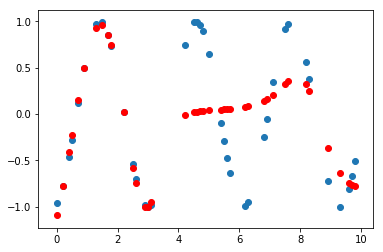

In [0]:
# Quiz.

x1 = np.arange(0, 10, 0.1)
x2 = np.arange(5, 15, 0.1)

x = np.zeros((x1.shape[0],2))
x[:,0] = x1
x[:,1] = x2
np.random.shuffle(x)
# y = np.sin(x[:,0]+x[:,1])
y = np.sin( np.sum(x, axis=1) )


s = int(x.shape[0]*0.6)
train_x, test_x = x[:s], x[s:]
train_y, test_y = y[:s], y[s:]




from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
# model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh', input_shape=(2,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()

start = time.time()
model.fit(train_x, train_y, epochs=1000*5, verbose=0, batch_size=20)
print("elapsed :", (time.time() - start))

loss, mse = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mse=", mse)
              
y_ = model.predict(test_x)

# plt.scatter(test_x,test_y)
# plt.scatter(test_x,y_, color="r")
plt.scatter(test_x.T[0],test_y)
plt.scatter(test_x.T[0],y_, color="r")
plt.show()


elapsed : 9.149303197860718


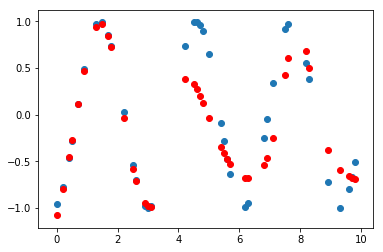

elapsed : 9.823808193206787


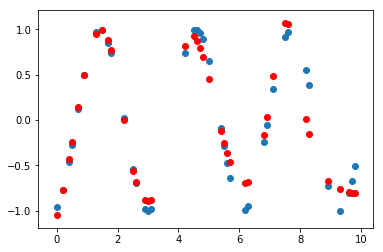

elapsed : 9.465433835983276


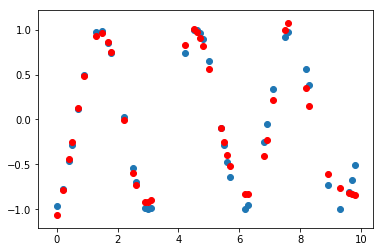

elapsed : 9.344187259674072


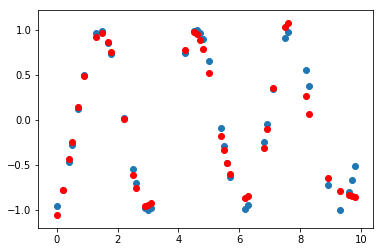

elapsed : 9.294390201568604


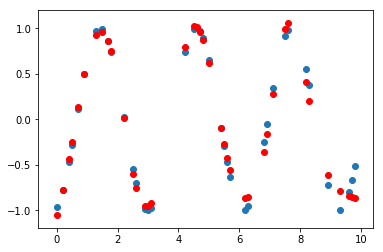

elapsed : 9.326446533203125


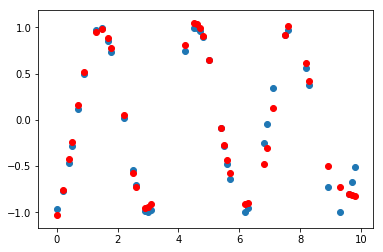

elapsed : 9.300206899642944


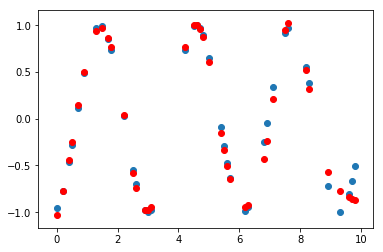

elapsed : 9.36500096321106


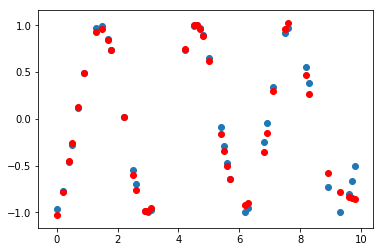

elapsed : 9.364132642745972


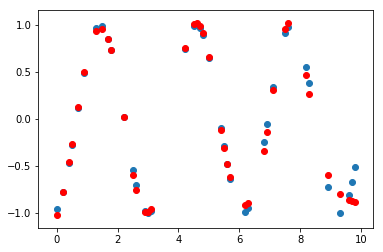

elapsed : 9.530864000320435


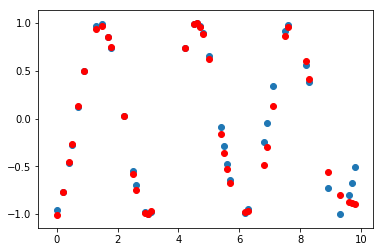

elapsed : 9.379406929016113


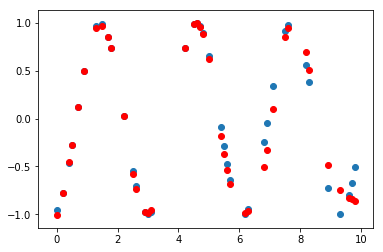

elapsed : 9.27100920677185


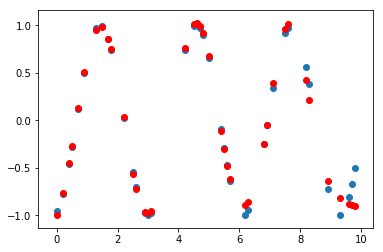

elapsed : 9.307053089141846


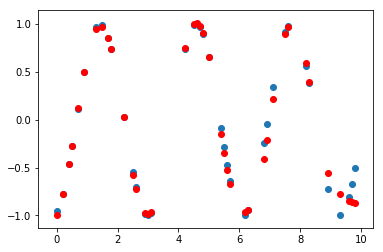

elapsed : 9.30069637298584


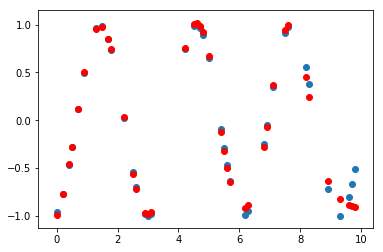

elapsed : 9.278026103973389


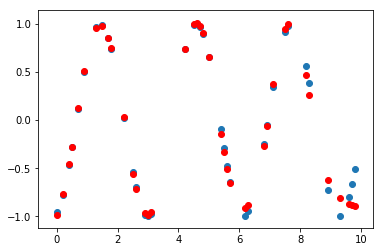

elapsed : 9.40105938911438


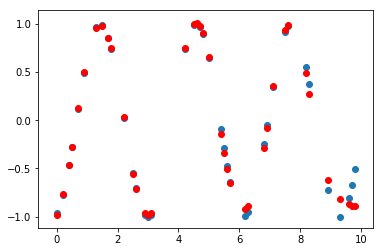

elapsed : 9.361606121063232


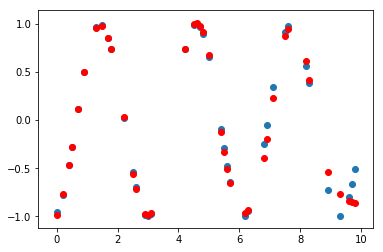

elapsed : 9.314889669418335


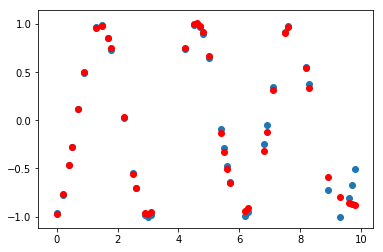

elapsed : 9.20395827293396


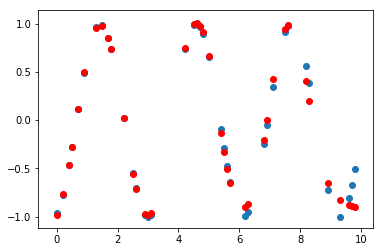

elapsed : 9.306206226348877


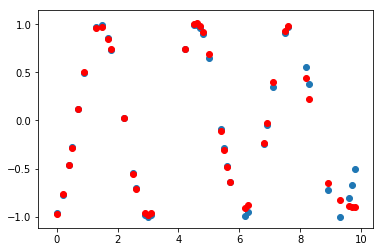

elapsed : 9.515431880950928


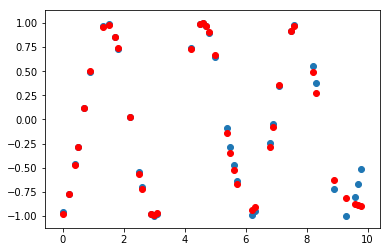

elapsed : 9.364335298538208


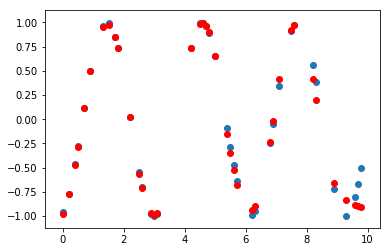

elapsed : 9.366993188858032


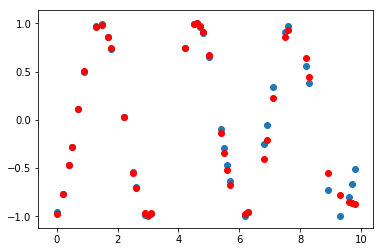

elapsed : 9.372554063796997


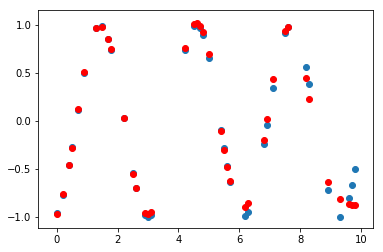

elapsed : 9.361530780792236


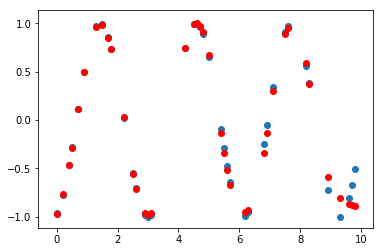

elapsed : 9.467908143997192


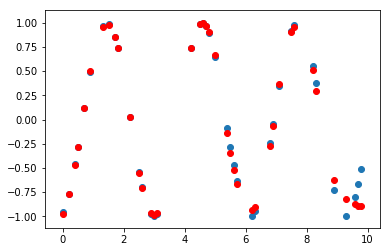

elapsed : 9.384463787078857


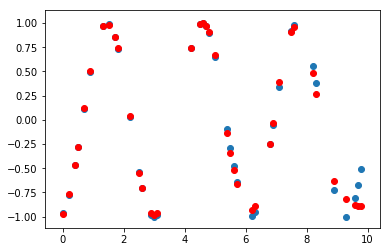

elapsed : 9.399217367172241


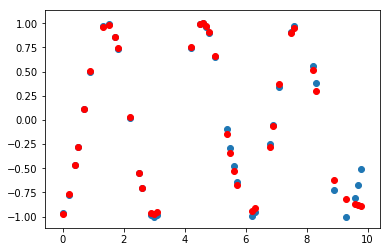

elapsed : 9.43299150466919


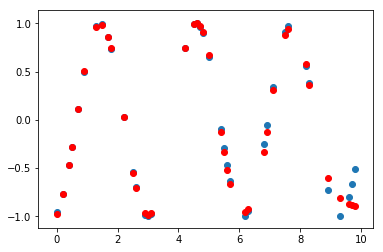

elapsed : 9.371923685073853


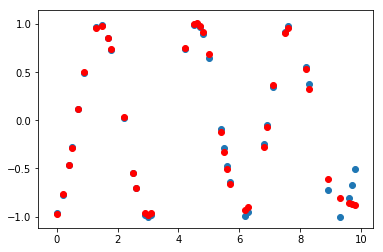

In [0]:
for i in range(30):
  start = time.time()
  model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
  print("elapsed :", (time.time() - start))

  y_ = model.predict(test_x)

  plt.scatter(test_x.T[0],test_y)
  plt.scatter(test_x.T[0],y_, color="r")
  plt.show()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_98 (Dense)             (None, 10)                30        
_________________________________________________________________
dense_99 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_100 (Dense)            (None, 1)                 11        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________
elapsed : 47.110872745513916
40/40 [==============================] - 0s 2ms/sample - loss: 0.0639 - mean_squared_error: 0.0639
loss= 0.06389686018228531
mse= 0.06389686


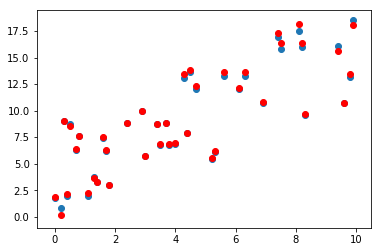

In [0]:
# Quiz. y = x1 + x2의 함수를 학습
# 3.5 + 4.2 => 7.7
# 1.9 + 3.0 => 4.9

x1 = np.arange(0, 10, 0.1)
np.random.shuffle(x1)
x2 = np.arange(0, 10, 0.1)
np.random.shuffle(x2)

x[:,0] = x1
x[:,1] = x2
np.random.shuffle(x)

y = np.sum(x, axis=1)



s = int(x.shape[0]*0.6)
train_x, test_x = x[:s], x[s:]
train_y, test_y = y[:s], y[s:]




from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
# model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh', input_shape=(2,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()

start = time.time()
model.fit(train_x, train_y, epochs=1000*5, verbose=0, batch_size=20)
print("elapsed :", (time.time() - start))

loss, mse = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mse=", mse)
              
y_ = model.predict(test_x)

# plt.scatter(test_x,test_y)
# plt.scatter(test_x,y_, color="r")
plt.scatter(test_x.T[0],test_y)
plt.scatter(test_x.T[0],y_, color="r")
plt.show()

In [0]:
# Quiz

x y1 y2
0  0  0
1  1  1
2  0  2
3  1  0
4  0  1
5  1  2
6  0  0
7  1  1
8  0  2
9  1  0

y
0  0
1  1
0  2
1  0
0  1
1  2
0  0
1  1
0  2
1  0


x = np.arange(0,10, 0.1)

y = 





Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_113 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_114 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_115 (Dense)            (None, 2)                 22        
Total params: 152
Trainable params: 152
Non-trainable params: 0
_________________________________________________________________
elapsed : 96.25879001617432
40/40 [==============================] - 0s 2ms/sample - loss: 0.5586 - mean_squared_error: 0.5586
loss= 0.5586434245109558
mse= 0.55864346


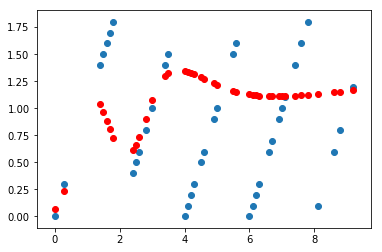

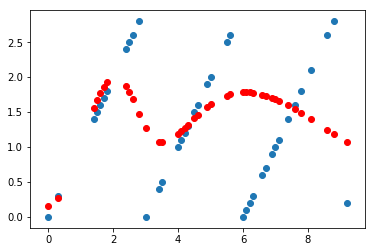

In [0]:
###### NEW START
x = np.arange(0, 10, 0.1)
np.random.shuffle(x)
y1 = x%2
y2 = x%3

y = np.zeros((y.shape[0],2))
y[:,0] = y1
y[:,1] = y2
##### NEW END


s = int(x.shape[0]*0.6)
train_x, test_x = x[:s], x[s:]
train_y, test_y = y[:s], y[s:]


from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
# model.add(Dense(1))
model.add(Dense(2))

model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()

start = time.time()
model.fit(train_x, train_y, epochs=1000*10, verbose=0, batch_size=20)
print("elapsed :", (time.time() - start))

loss, mse = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mse=", mse)
              
y_ = model.predict(test_x)

# plt.scatter(test_x,test_y)
# plt.scatter(test_x,y_, color="r")
plt.scatter(test_x,test_y[:,0])
plt.scatter(test_x,y_[:,0], color="r")
plt.show()

plt.scatter(test_x,test_y[:,1])
plt.scatter(test_x,y_[:,1], color="r")
plt.show()


elapsed : 95.4321358203888
40/40 [==============================] - 0s 236us/sample - loss: 0.5314 - mean_squared_error: 0.5314
loss= 0.5314478874206543
mse= 0.5314479


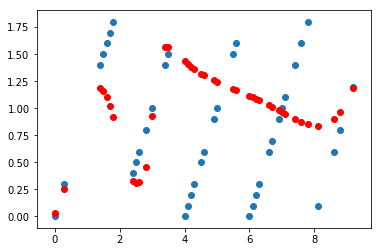

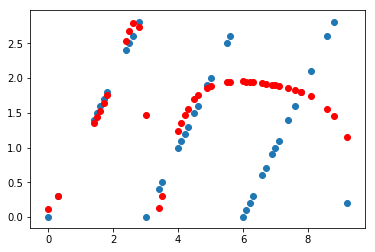

elapsed : 94.98689246177673
40/40 [==============================] - 0s 230us/sample - loss: 0.5314 - mean_squared_error: 0.5314
loss= 0.5313516974449157
mse= 0.5313517


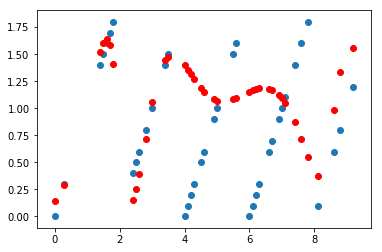

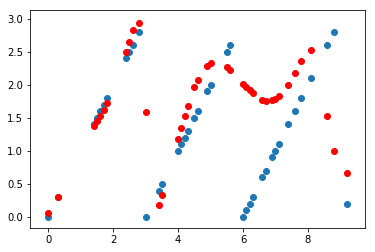

elapsed : 95.18511438369751
40/40 [==============================] - 0s 233us/sample - loss: 0.3928 - mean_squared_error: 0.3928
loss= 0.39283089637756347
mse= 0.3928309


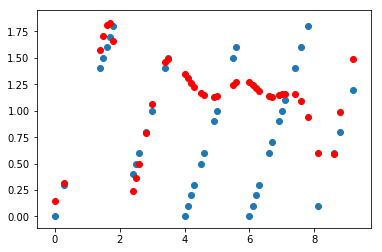

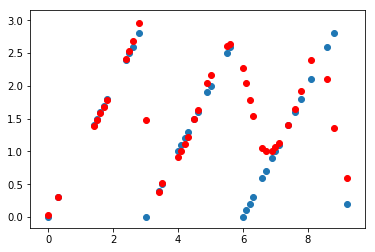

elapsed : 94.91667032241821
40/40 [==============================] - 0s 268us/sample - loss: 0.3155 - mean_squared_error: 0.3155
loss= 0.31553872525691984
mse= 0.3155387


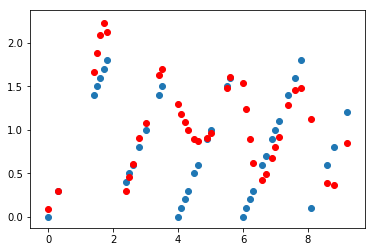

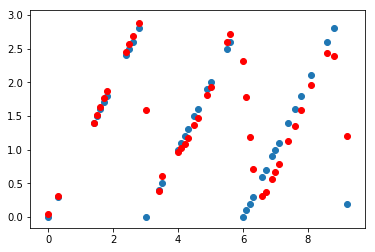

KeyboardInterrupt: ignored

In [0]:
for i in range(10):
  start = time.time()
  model.fit(train_x, train_y, epochs=1000*10, verbose=0, batch_size=20)
  print("elapsed :", (time.time() - start))

  y_ = model.predict(test_x)

  plt.scatter(test_x,test_y[:,0])
  plt.scatter(test_x,y_[:,0], color="r")
  plt.show()

  plt.scatter(test_x,test_y[:,1])
  plt.scatter(test_x,y_[:,1], color="r")
  plt.show()

In [0]:
def fit_one_more(model, train_x, train_y, test_x, test_y, batch_size):
  start = time.time()
#   model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
  model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=batch_size)
  print("elapsed :", (time.time() - start))

  y_ = model.predict(test_x)

  plt.scatter(test_x,test_y)
  plt.scatter(test_x,y_, color="r")
  plt.show()

In [0]:
(train_x, train_y), (test_x, test_y) = get_sin_data(0, 10, 0.01)

from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()

for batch_size in [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]:
  fit_one_more(model, train_x, train_y, test_x, test_y, batch_size)
  




Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_116 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_117 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_118 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


KeyboardInterrupt: ignored

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_119 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_120 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_121 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 10.408358097076416
40/40 [==============================] - 0s 3ms/sample - loss: 0.1993 - mean_squared_error: 0.1993
loss= 0.19930938482284546
mse= 0.19930938


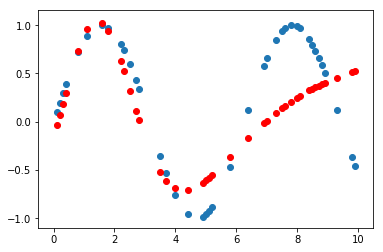

In [0]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()

start = time.time()
# model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed :", (time.time() - start))

loss, mse = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mse=", mse)
              
y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_, color="r")
plt.show()

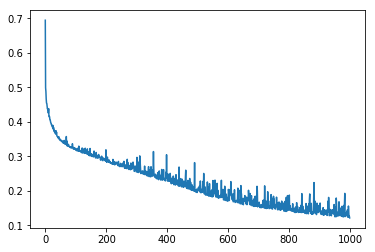

In [0]:
plt.plot(history.history['loss'])

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_122 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_123 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_124 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 16.649149894714355
40/40 [==============================] - 0s 194us/sample - loss: 0.1766 - mean_squared_error: 0.1766
loss= 0.17662876844406128
mse= 0.17662877


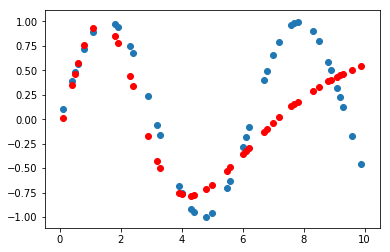

In [0]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()

start = time.time()
# history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20, 
                    validation_data=(test_x, test_y))
print("elapsed :", (time.time() - start))

loss, mse = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mse=", mse)
              
y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_, color="r")
plt.show()

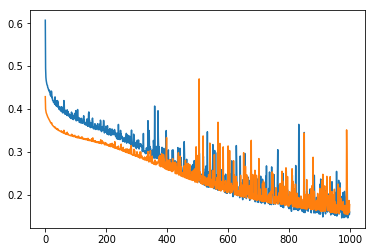

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) # ADD

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_125 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_126 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_127 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 14.750601768493652
40/40 [==============================] - 0s 202us/sample - loss: 0.1471 - mean_squared_error: 0.1471
loss= 0.14711381793022155
mse= 0.14711383


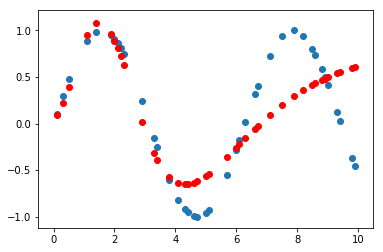

In [0]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()

start = time.time()
# history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20,
                   validation_split=0.1)
print("elapsed :", (time.time() - start))

loss, mse = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mse=", mse)
              
y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_, color="r")
plt.show()

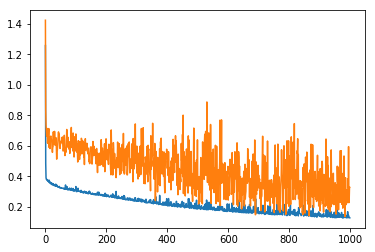

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_134 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_135 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_136 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
6000/6000 - 1s - loss: 0.3520 - mean_squared_error: 0.3520
Epoch 2/10
6000/6000 - 1s - loss: 0.3090 - mean_squared_error: 0.3090
Epoch 3/10
6000/6000 - 1s - loss: 0.2819 - mean_squared_error: 0.2819
Epoch 4/10
6000/6000 - 1s - loss: 0.2524 - mean_squared_error: 0.2524
Epoch 5/10
6000/6000 - 1s - loss: 0.2243 - mean_squared_error: 0.2243
Epoch 6/10
6000/6000 - 1s - loss: 0

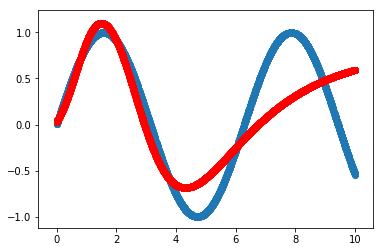

In [0]:
# (train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.001)

model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()

start = time.time()
# history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
history = model.fit(train_x, train_y, epochs=10, verbose=2, batch_size=20)
print("elapsed :", (time.time() - start))

loss, mse = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mse=", mse)
              
y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_, color="r")
plt.show()

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_137 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_138 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_139 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 10.941328287124634
40/40 [==============================] - 0s 3ms/sample - loss: 0.1349 - mean_squared_error: 0.1349
loss= 0.1348812997341156
mse= 0.1348813


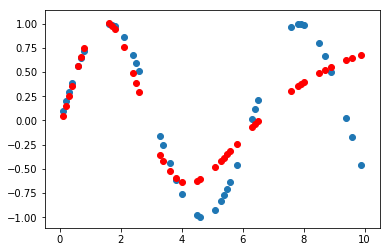

In [0]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()

start = time.time()
# model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20, shuffle=True)
print("elapsed :", (time.time() - start))

loss, mse = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mse=", mse)
              
y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_, color="r")
plt.show()

60


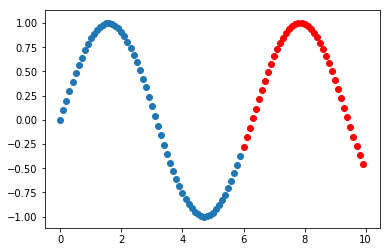

In [0]:
x = np.arange(0,10,0.1)
#np.random.shuffle(x) # COMMENTED
y = np.sin(x)

split_index = int(x.shape[0]*0.6)
print(split_index)

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

plt.scatter(train_x, train_y)
plt.scatter(test_x, test_y, color="r")

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_140 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_141 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_142 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 10.849143028259277
40/40 [==============================] - 0s 3ms/sample - loss: 0.1664 - mean_squared_error: 0.1664
loss= 0.16640717685222625
mse= 0.16640718


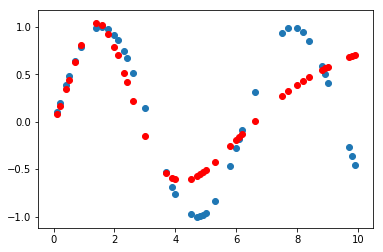

In [0]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()

start = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed :", (time.time() - start))

loss, mse = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mse=", mse)
              
y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_, color="r")
plt.show()

In [0]:
model.save("my_model.h5")

!ls -al

total 48
drwxr-xr-x 1 root root  4096 Jul 22 07:15 .
drwxr-xr-x 1 root root  4096 Jul 22 00:47 ..
-rw-r--r-- 1 root root 12249 Jul 22 01:46 base_result.png
drwxr-xr-x 1 root root  4096 Jul 18 16:06 .config
-rw-r--r-- 1 root root 19760 Jul 22 07:15 my_model.h5
drwxr-xr-x 1 root root  4096 Jul  3 16:14 sample_data


W0722 07:16:42.734243 139817278367616 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0722 07:16:42.738326 139817278367616 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


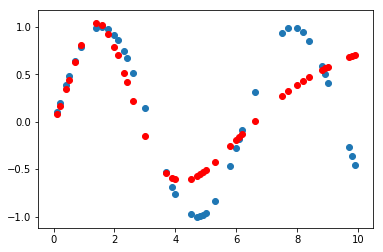

In [0]:
new_model = keras.models.load_model("my_model.h5")

y_ = new_model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()